# TOC
1. 

## Question 1
A company needs to architect a hybrid DNS solution. This solution will use an Amazon Route 53 private hosted zone for the domain cloud.example.com for the resources stored within VPCs.

The company has the following DNS resolution requirements:
- On-premises systems should be able to resolve and connect to cloud.example.com.
- All VPCs should be able to resolve cloud.example.com.
- There is already an AWS Direct Connect connection between the on-premises corporate network and AWS Transit Gateway.

Which architecture should the company use to meet these requirements with the HIGHEST performance?

1. Associate the private hosted zone to all the VPCs. Create a Route 53 inbound resolver in the shared services VPC. Attach all VPCs to the transit gateway and create forwarding rules in the on-premises DNS server for cloud.example.com that point to the inbound resolver.
2. Associate the private hosted zone to all the VPCs. Deploy an Amazon EC2 conditional forwarder in the shared services VPC. Attach all VPCs to the transit gateway and create forwarding rules in the on-premises DNS server for cloud.example.com that point to the conditional forwarder.
3. Associate the private hosted zone to the shared services VPC. Create a Route 53 outbound resolver in the shared services VPC. Attach all VPCs to the transit gateway and create forwarding rules in the on-premises DNS server for cloud.example.com that point to the outbound resolver.
4. Associate the private hosted zone to the shared services VPC. Create a Route 53 inbound resolver in the shared services VPC. Attach the shared services VPC to the transit gateway and create forwarding rules in the on-premises DNS server for cloud.example.com that point to the inbound resolver.

#### Unknown terms
- **Route53 inbound/outbound resolver** \
    Route53 resolver helps resolve DNS queries between on-prem and AWS resources \
    Inbound resolver Endpoints allow DNS queries from to reach on-prem DNS servers from your VPC \
    Outbound resolver Endpoints are vice versa \
    https://docs.aws.amazon.com/Route53/latest/DeveloperGuide/resolver.html
- **shared services VPC** \
    Centralize shared services into a VPC \
    https://docs.aws.amazon.com/vpc/latest/userguide/vpc-sharing.html
    
- **EC2 conditional forwarder** do not exists \
    conditional forwarder: https://www.linkedin.com/pulse/understanding-essential-dns-settings-forwarders-prabu-ponnan/ \
    https://docs.aws.amazon.com/whitepapers/latest/hybrid-cloud-dns-options-for-vpc/decentralized-conditional-forwarders.html

**Answer: 1**

Reference: [Hybrid DNS resolution with Amazon Route 53 Resolver Endpoints](https://d1.awsstatic.com/architecture-diagrams/ArchitectureDiagrams/hybrid-dns_route53-resolver-endpoint-ra.pdf)

Explanation:

- 2: No such services Amazon EC2 conditional forwarder
- 3: For on-prem to resolve private domain in AWS must point to inbound resolver
- 4: If only attach transit gateway, after resolving domain name AWS resources can not reach on-prem or vice versa


In [2]:
%%bash
echo "hello bash shell"
ls -al /

hello bash shell
total 76
drwxr-xr-x   1 root root 4096 Oct 13 04:28 .
drwxr-xr-x   1 root root 4096 Oct 13 04:28 ..
lrwxrwxrwx   1 root root    7 Aug 16 02:02 bin -> usr/bin
drwxr-xr-x   2 root root 4096 Apr 18  2022 boot
drwxr-xr-x   5 root root  340 Oct 13 04:28 dev
-rwxr-xr-x   1 root root    0 Oct 13 04:28 .dockerenv
drwxr-xr-x   1 root root 4096 Oct 13 04:28 etc
drwxr-xr-x   1 root root 4096 Sep 25 03:03 home
lrwxrwxrwx   1 root root    7 Aug 16 02:02 lib -> usr/lib
lrwxrwxrwx   1 root root    9 Aug 16 02:02 lib32 -> usr/lib32
lrwxrwxrwx   1 root root    9 Aug 16 02:02 lib64 -> usr/lib64
lrwxrwxrwx   1 root root   10 Aug 16 02:02 libx32 -> usr/libx32
drwxr-xr-x   2 root root 4096 Aug 16 02:03 media
drwxr-xr-x   2 root root 4096 Aug 16 02:03 mnt
drwxr-xr-x   1 root root 4096 Sep 25 03:12 opt
dr-xr-xr-x 288 root root    0 Oct 13 04:28 proc
drwx------   2 root root 4096 Aug 16 02:06 root
drwxr-xr-x   5 root root 4096 Aug 16 02:06 run
lrwxrwxrwx   1 root root    8 Aug 16 02:02 sbin -

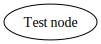

In [1]:
from graphviz import Graph
g = Graph()
g.node('Test node')
g

## Question 2
A company is providing weather data over a REST-based API to several customers. The API is hosted by Amazon API Gateway and is integrated with different AWS Lambda functions for each API operation. The company uses Amazon Route 53 for DNS and has created a resource record of weather.example.com. The company stores data for the API in Amazon DynamoDB tables. The company needs a solution that will give the API the ability to fail over to a different AWS Region.
Which solution will meet these requirements?

1. Deploy a new set of Lambda functions in a new Region. Update the API Gateway API to use an edge-optimized API endpoint with Lambda functions from both Regions as targets. Convert the DynamoDB tables to global tables.
2. Deploy a new API Gateway API and Lambda functions in another Region. Change the Route 53 DNS record to a multivalue answer. Add both API Gateway APIs to the answer. Enable target health monitoring. Convert the DynamoDB tables to global tables.
3. Deploy a new API Gateway API and Lambda functions in another Region. Change the Route 53 DNS record to a failover record. Enable target health monitoring. Convert the DynamoDB tables to global tables.
4. Deploy a new API Gateway API in a new Region. Change the Lambda functions to global functions. Change the Route 53 DNS record to a multivalue answer. Add both API Gateway APIs to the answer. Enable target health monitoring. Convert the DynamoDB tables to global tables.

#### Unknown terms
- **[Edge-optimized API endpoints](https://docs.aws.amazon.com/apigateway/latest/developerguide/api-gateway-basic-concept.html#apigateway-definition-edge-optimized-api-endpoint)** \
  Using CloudFront distribution to help client access API Gateway API faster
- **[Failover routing](https://docs.aws.amazon.com/Route53/latest/DeveloperGuide/routing-policy-failover.html)** \
  route traffic to a healthy resource or to a different resource when the first resource is unhealthy

**Answer: 3**

Reference: [Implementing Multi-Region Disaster Recovery Using Event-Driven Architecture](https://aws.amazon.com/blogs/architecture/implementing-multi-region-disaster-recovery-using-event-driven-architecture/)

Explanation:
- 1: Edge-optimized API endpoints helps route traffic to distributed client

- 2 & 4: Multivalue answer routing provide load balancing and route traffic randomly \
  Reference: [Multivalue answer routing](https://docs.aws.amazon.com/Route53/latest/DeveloperGuide/routing-policy-multivalue.html)

- 4: No such global Lambda function only [Lambda@edge](https://docs.aws.amazon.com/lambda/latest/dg/lambda-edge.html)

## Question 3
A company uses AWS Organizations with a single OU named Production to manage multiple accounts. All accounts are members of the Production OU. Administrators use deny list SCPs in the root of the organization to manage access to restricted services.
The company recently acquired a new business unit and invited the new unit’s existing AWS account to the organization. Once onboarded, the administrators of the new business unit discovered that they are not able to update existing AWS Config rules to meet the company’s policies.
Which option will allow administrators to make changes and continue to enforce the current policies without introducing additional long-term maintenance?

1. Remove the organization’s root SCPs that limit access to AWS Config. Create AWS Service Catalog products for the company’s standard AWS Config rules and deploy them throughout the organization, including the new account.
2. Create a temporary OU named Onboarding for the new account. Apply an SCP to the Onboarding OU to allow AWS Config actions. Move the new account to the Production OU when adjustments to AWS Config are completed.
3. Convert the organization’s root SCPs from deny list SCPs to allow list SCPs to allow the required services only. Temporarily apply an SCP to the organization’s root that allows AWS Config actions for principals only in the new account.
4. Create a temporary OU named Onboarding for the new account. Apply an SCP to the Onboarding OU to allow AWS Config actions. Move the organization’s root SCP to the Production OU. Move the new account to the Production OU when adjustments to AWS Config are complete.

#### Unknown terms:
- [Service Catalog](https://docs.aws.amazon.com/servicecatalog/)
- [Understanding management policy inheritance](https://docs.aws.amazon.com/organizations/latest/userguide/orgs_manage_policies_inheritance_mgmt.html)

**Answer: 4**

Explanation:
- 1: AWS Service Catalog does not support AWS Config \
    [AWS Service Catalog's Product](https://docs.aws.amazon.com/servicecatalog/latest/adminguide/what-is_concepts.html#what-is_concepts-product)
- 2: The Onboarding OU inhertis the deny SCPs in the root of the organization
- 3: This option will cause additional long-term maintenance, everytime an account in the new unit want to update required services, we have to repeat this action


## Question 4
A company is running a two-tier web-based application in an on-premises data center. The application layer consists of a single server running a stateful application. The application connects to a PostgreSQL database running on a separate server. The application’s user base is expected to grow significantly, so the company is migrating the application and database to AWS. The solution will use Amazon Aurora PostgreSQL, Amazon EC2 Auto Scaling, and Elastic Load Balancing.

Which solution will provide a consistent user experience that will allow the application and database tiers to scale?

1. Enable Aurora Auto Scaling for Aurora Replicas. Use a Network Load Balancer with the least outstanding requests routing algorithm and sticky sessions enabled.

2. Enable Aurora Auto Scaling for Aurora writers. Use an Application Load Balancer with the round robin routing algorithm and sticky sessions enabled.

3. Enable Aurora Auto Scaling for Aurora Replicas. Use an Application Load Balancer with the round robin routing and sticky sessions enabled.

4. Enable Aurora Scaling for Aurora writers. Use a Network Load Balancer with the least outstanding requests routing algorithm and sticky sessions enabled.

**Answer: 3**

#### Unknown terms:
- [Routing algorithm](https://docs.aws.amazon.com/elasticloadbalancing/latest/application/load-balancer-target-groups.html#modify-routing-algorithm)

Explanation:
- 1: Only ALB has routing algorithm
- 2 & 4: Aurora Auto Scaling for Aurora writers does not exist

## Question 5
A company uses a service to collect metadata from applications that the company hosts on premises. Consumer devices such as TVs and internet radios access the applications. Many older devices do not support certain HTTP headers and exhibit errors when these headers are present in responses. The company has configured an on-premises load balancer to remove the unsupported headers from responses sent to older devices, which the company identified by the User-Agent headers.

The company wants to migrate the service to AWS, adopt serverless technologies, and retain the ability to support the older devices. The company has already migrated the applications into a set of AWS Lambda functions.
Which solution will meet these requirements?

1. Create an Amazon CloudFront distribution for the metadata service. Create an Application Load Balancer (ALB). Configure the CloudFront distribution to forward requests to the ALB. Configure the ALB to invoke the correct Lambda function for each type of request. Create a CloudFront function to remove the problematic headers based on the value of the User-Agent header.

2. Create an Amazon API Gateway REST API for the metadata service. Configure API Gateway to invoke the correct Lambda function for each type of request. Modify the default gateway responses to remove the problematic headers based on the value of the User-Agent header.

3. Create an Amazon API Gateway HTTP API for the metadata service. Configure API Gateway to invoke the correct Lambda function for each type of request. Create a response mapping template to remove the problematic headers based on the value of the User-Agent. Associate the response data mapping with the HTTP API.

4. Create an Amazon CloudFront distribution for the metadata service. Create an Application Load Balancer (ALB). Configure the CloudFront distribution to forward requests to the ALB. Configure the ALB to invoke the correct Lambda function for each type of request. Create a Lambda@Edge function that will remove the problematic headers in response to viewer requests based on the value of the User-Agent header.

**Answer: 1**
> Header manipulation – You can insert, modify, or delete HTTP headers in the request or response. For example, you can add a True-Client-IP header to every request.

[CloudFront Functions](https://docs.aws.amazon.com/AmazonCloudFront/latest/DeveloperGuide/cloudfront-functions.html)

Explanation:
- 2 & 3: require a lot of maintanence

## Question 6
A retail company needs to provide a series of data files to another company, which is its business partner. These files are saved in an Amazon S3 bucket under Account A, which belongs to the retail company. The business partner company wants one of its IAM users, User_DataProcessor, to access the files from its own AWS account (Account B).

Which combination of steps must the companies take so that User_DataProcessor can access the S3 bucket successfully? (Choose two.)

1. Turn on the cross-origin resource sharing (CORS) feature for the S3 bucket in Account A.

2. In Account A, set the S3 bucket policy to the following: \
![Q6_B](../images/q6/B.png)

3. In Account A, set the S3 bucket policy to the following: \
![Q6_C](../images/q6/C.png)

4. In Account B, set the permissions of User_DataProcessor to the following: \
![Q6_D](../images/q6/D.png)

5. In Account B, set the permissions of User_DataProcessor to the following: \
![Q6_E](../images/q6/E.png)

**Answer: 3 & 5**

Explanation: It's apply the least priviledge principle 

## Question 7
A company is running a traditional web application on Amazon EC2 instances. The company needs to refactor the application as microservices that run on containers. Separate versions of the application exist in two distinct environments: production and testing. Load for the application is variable, but the minimum load and the maximum load are known. A solutions architect needs to design the updated application with a serverless architecture that minimizes operational complexity.

Which solution will meet these requirements MOST cost-effectively?

1. Upload the container images to AWS Lambda as functions. Configure a concurrency limit for the associated Lambda functions to handle the expected peak load. Configure two separate Lambda integrations within Amazon API Gateway: one for production and one for testing.

2. Upload the container images to Amazon Elastic Container Registry (Amazon ECR). Configure two auto scaled Amazon Elastic Container Service (Amazon ECS) clusters with the Fargate launch type to handle the expected load. Deploy tasks from the ECR images. Configure two separate Application Load Balancers to direct traffic to the ECS clusters.

3. Upload the container images to Amazon Elastic Container Registry (Amazon ECR). Configure two auto scaled Amazon Elastic Kubernetes Service (Amazon EKS) clusters with the Fargate launch type to handle the expected load. Deploy tasks from the ECR images. Configure two separate Application Load Balancers to direct traffic to the EKS clusters.

4. Upload the container images to AWS Elastic Beanstalk. In Elastic Beanstalk, create separate environments and deployments for production and testing. Configure two separate Application Load Balancers to direct traffic to the Elastic Beanstalk deployments.

**Answer: 2**

Explanation:
- 1 & 4: Lambda and Elastic Beanstalk are not a place to store container image
- 3: EKS cost more than ECS

## Question 8
A company has a multi-tier web application that runs on a fleet of Amazon EC2 instances behind an Application Load Balancer (ALB). The instances are in an Auto Scaling group. The ALB and the Auto Scaling group are replicated in a backup AWS Region. The minimum value and the maximum value for the Auto Scaling group are set to zero. An Amazon RDS Multi-AZ DB instance stores the application’s data. The DB instance has a read replica in the backup Region. The application presents an endpoint to end users by using an Amazon Route 53 record.

The company needs to reduce its RTO to less than 15 minutes by giving the application the ability to automatically fail over to the backup Region. The company does not have a large enough budget for an active-active strategy.
What should a solutions architect recommend to meet these requirements?

1. Reconfigure the application’s Route 53 record with a latency-based routing policy that load balances traffic between the two ALBs. Create an AWS Lambda function in the backup Region to promote the read replica and modify the Auto Scaling group values. Create an Amazon CloudWatch alarm that is based on the HTTPCode_Target_5XX_Count metric for the ALB in the primary Region. Configure the CloudWatch alarm to invoke the Lambda function.

2. Create an AWS Lambda function in the backup Region to promote the read replica and modify the Auto Scaling group values. Configure Route 53 with a health check that monitors the web application and sends an Amazon Simple Notification Service (Amazon SNS) notification to the Lambda function when the health check status is unhealthy. Update the application’s Route 53 record with a failover policy that routes traffic to the ALB in the backup Region when a health check failure occurs.

3. Configure the Auto Scaling group in the backup Region to have the same values as the Auto Scaling group in the primary Region. Reconfigure the application’s Route 53 record with a latency-based routing policy that load balances traffic between the two ALBs. Remove the read replica. Replace the read replica with a standalone RDS DB instance. Configure Cross-Region Replication between the RDS DB instances by using snapshots and Amazon S3.

4. Configure an endpoint in AWS Global Accelerator with the two ALBs as equal weighted targets. Create an AWS Lambda function in the backup Region to promote the read replica and modify the Auto Scaling group values. Create an Amazon CloudWatch alarm that is based on the HTTPCode_Target_5XX_Count metric for the ALB in the primary Region. Configure the CloudWatch alarm to invoke the Lambda function.

**Answer: 2**

use [active-passive](https://docs.aws.amazon.com/whitepapers/latest/disaster-recovery-workloads-on-aws/disaster-recovery-options-in-the-cloud.html) recovery strategies for lower budget

Explanation:
- 1 & 3: The [latency-based routing policy](https://docs.aws.amazon.com/Route53/latest/DeveloperGuide/routing-policy-latency.html) is for improving performance

> If your application is hosted in multiple AWS Regions, you can improve performance for your users by serving their requests from the AWS Region that provides the lowest latency. 

- 4: AWS Global Accelerator is suit for load balancing but not for active-passive strategies

## Question 9
A company is hosting a critical application on a single Amazon EC2 instance. The application uses an Amazon ElastiCache for Redis single-node cluster for an in-memory data store. The application uses an Amazon RDS for MariaDB DB instance for a relational database. For the application to function, each piece of the infrastructure must be healthy and must be in an active state.

A solutions architect needs to improve the application's architecture so that the infrastructure can automatically recover from failure with the least possible downtime.

Which combination of steps will meet these requirements? (Choose three.)

1. Use an Elastic Load Balancer to distribute traffic across multiple EC2 instances. Ensure that the EC2 instances are part of an Auto Scaling group that has a minimum capacity of two instances.

2. Use an Elastic Load Balancer to distribute traffic across multiple EC2 instances. Ensure that the EC2 instances are configured in unlimited mode.

3. Modify the DB instance to create a read replica in the same Availability Zone. Promote the read replica to be the primary DB instance in failure scenarios.

4. Modify the DB instance to create a Multi-AZ deployment that extends across two Availability Zones.

5. Create a replication group for the ElastiCache for Redis cluster. Configure the cluster to use an Auto Scaling group that has a minimum capacity of two instances.

6. Create a replication group for the ElastiCache for Redis cluster. Enable Multi-AZ on the cluster.

**Answer: 1, 4, 6**

Explanation:
- 2: [EC2 instances's unlimited mode](https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/burstable-performance-instances-unlimited-mode.html) used for increasing performance
- 3 & 5: only [RDS Multi-AZ deployment](https://docs.aws.amazon.com/AmazonRDS/latest/UserGuide/Concepts.MultiAZ.html) and [ElastiCache with Multi-AZ](https://docs.aws.amazon.com/AmazonElastiCache/latest/red-ug/AutoFailover.html) support failover

## Question 10
A retail company is operating its ecommerce application on AWS. The application runs on Amazon EC2 instances behind an Application Load Balancer (ALB). The company uses an Amazon RDS DB instance as the database backend. Amazon CloudFront is configured with one origin that points to the ALB. Static content is cached. Amazon Route 53 is used to host all public zones.
After an update of the application, the ALB occasionally returns a 502 status code (Bad Gateway) error. The root cause is malformed HTTP headers that are returned to the ALB. The webpage returns successfully when a solutions architect reloads the webpage immediately after the error occurs.

While the company is working on the problem, the solutions architect needs to provide a custom error page instead of the standard ALB error page to visitors.

Which combination of steps will meet this requirement with the LEAST amount of operational overhead? (Choose two.)

1. Create an Amazon S3 bucket. Configure the S3 bucket to host a static webpage. Upload the custom error pages to Amazon S3.
2. Create an Amazon CloudWatch alarm to invoke an AWS Lambda function if the ALB health check response Target.FailedHealthChecks is greater than 0. Configure the Lambda function to modify the forwarding rule at the ALB to point to a publicly accessible web server.
3. Modify the existing Amazon Route 53 records by adding health checks. Configure a fallback target if the health check fails. Modify DNS records to point to a publicly accessible webpage.
4. Create an Amazon CloudWatch alarm to invoke an AWS Lambda function if the ALB health check response Elb.InternalError is greater than 0. Configure the Lambda function to modify the forwarding rule at the ALB to point to a public accessible web server.
5. Add a custom error response by configuring a CloudFront custom error page. Modify DNS records to point to a publicly accessible web page.

**Answer: 1, 5**

Explanation:
- 2 & 4: using Lambda to modify ALB require more operational overhead and add complexity
- 3: if a client request come before health check, error page won't be shown